In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('netflix_users.csv')
df.head()

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login
0,1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12
1,2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05
2,3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24
3,4,Emma Miller,44,USA,Premium,261.56,Documentary,2024-03-25
4,5,Jane Smith,68,USA,Standard,909.30,Drama,2025-01-14


In [ ]:
df.isnull().sum() # to check for missing values

User_ID              0
Name                 0
Age                  0
Country              0
Subscription_Type    0
Watch_Time_Hours     0
Favorite_Genre       0
Last_Login           0
dtype: int64

In [15]:
df['Last_Login'] = pd.to_datetime(df['Last_Login'])
df['year_month'] = df['Last_Login'].dt.to_period('M')
total_watched_per_month = df.groupby('year_month')['Watch_Time_Hours'].sum()
print(total_watched_per_month)

year_month
2024-03     788848.09
2024-04    1066681.17
2024-05    1048657.83
2024-06     977174.39
2024-07    1038176.26
2024-08    1031408.43
2024-09    1044973.85
2024-10    1080886.62
2024-11    1022486.35
2024-12    1102401.76
2025-01    1046855.23
2025-02     990886.69
2025-03     272284.78
Freq: M, Name: Watch_Time_Hours, dtype: float64


In [27]:
total_time_genre = df.groupby('Favorite_Genre')['Watch_Time_Hours'].sum()
print(total_time_genre)
mostwatched_genre = total_time_genre.idxmax()
print(f" The most watched genre is {mostwatched_genre}")

Favorite_Genre
Action         1789099.14
Comedy         1787154.64
Documentary    1820526.54
Drama          1782336.40
Horror         1806967.49
Romance        1810646.62
Sci-Fi         1714990.62
Name: Watch_Time_Hours, dtype: float64
 The most watched genre is Documentary


In [31]:
users_per_country = df.groupby('Country').size()
print(users_per_country)

Country
Australia    2437
Brazil       2503
Canada       2490
France       2473
Germany      2547
India        2505
Japan        2457
Mexico       2493
UK           2592
USA          2503
dtype: int64


In [ ]:
sub_type = df.groupby('Subscription_Type').size()
print(sub_type)

Subscription_Type
Basic       8356
Premium     8402
Standard    8242
dtype: int64


In [35]:
avg_age = df['Age'].mean()
print((avg_age.__round__(2)))

46.48


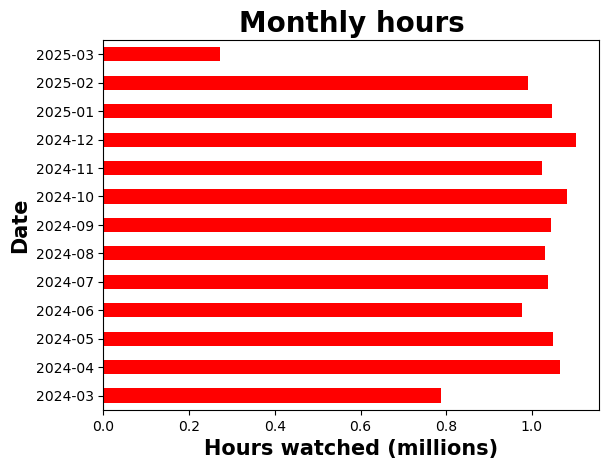

In [47]:
total_watched_per_month_millions = total_watched_per_month / 1000000
total_watched_per_month_millions.plot(kind= 'barh', color = 'red')
plt.title("Monthly hours", fontweight = 'bold', fontsize = '20')
plt.xlabel("Hours watched (millions)", fontsize = 15, fontweight = 'bold')
plt.ylabel("Date", fontsize = 15, fontweight = 'bold')
plt.show()

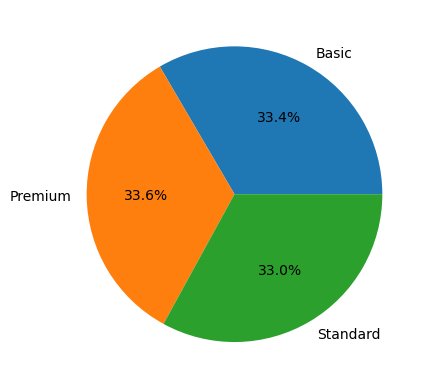

In [51]:
sub_type.plot(kind= 'pie', autopct = '%1.1f%%')
plt.show()